**Tools - NumPy**

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/tools_numpy.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

From the first tutorial in Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e

# Creating Arrays

Now let's import `numpy`. Most people import it as `np`:

In [1]:
import numpy as np

## `np.zeros`

The `zeros` function creates an array containing any number of zeros:

In [2]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (i.e. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [3]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Some vocabulary

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (e.g. 3*4=12)

Also important to note, the order in which dimensions are specified, be it in `.reshape`/`.shape`/`axis` or whatever, is from the outermost to innermost.
i.e `arr.reshape(4,3,2)` is saying there should be 4 subarrays, 3 subsubarrays and 2 elements (i.e 3 matrices, of 3 rows and 2 columns), and this holds for chaining higher dimensions too - the final dimension would always correspond intuitively to the number of columns, 2nd last to rows, 3rd last to matrices etc.

In [4]:
a = np.zeros((6,4)).reshape(4,3,2)
a

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [5]:
a.shape

(4, 3, 2)

In [6]:
a.ndim  # equal to len(a.shape)

3

In [7]:
a.size

24

## N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [8]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## Array type
NumPy arrays have the type `ndarray`s:

In [9]:
type(np.zeros((3,4)))

numpy.ndarray

## `np.ones`
Many other NumPy functions create `ndarray`s.

Here's a 3x4 matrix full of ones:

In [10]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## `np.full`
Creates an array of the given shape initialized with the given value. Here's a 3x4 matrix full of `π`.

In [11]:
np.full((3,4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

## `np.empty`
An uninitialized 2x3 array (its content is not predictable, as it is whatever is in memory at that point):

In [12]:
np.empty((2,3))

array([[4.83617906e-310, 0.00000000e+000, 6.68779721e-310],
       [6.68779721e-310, 6.68779721e-310, 6.68779721e-310]])

## np.array
Of course, you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [13]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## `np.arange`
You can create an `ndarray` using NumPy's `arange` function, which is similar to python's built-in `range` function:

In [14]:
np.arange(1, 5)

array([1, 2, 3, 4])

It also works with floats:

In [15]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

Of course, you can provide a step parameter:

In [16]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

However, when dealing with floats, the exact number of elements in the array is not always predictable. For example, consider this:

In [17]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))


[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


## `np.linspace`
For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [18]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


## `np.rand` and `np.randn`
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [19]:
np.random.rand(3,4)

array([[0.05522051, 0.16074336, 0.44109506, 0.1985606 ],
       [0.9703869 , 0.89416893, 0.99925564, 0.31274584],
       [0.43692168, 0.22152489, 0.95198834, 0.67834085]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [20]:
np.random.randn(3,4)

array([[-0.7805745 ,  0.90667216, -0.06355317,  0.32614987],
       [ 0.84193368, -0.32391655,  0.20512822,  0.33726662],
       [-0.9944159 ,  0.23772454, -1.80800917,  0.40029052]])

To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

In [21]:
import matplotlib.pyplot as plt

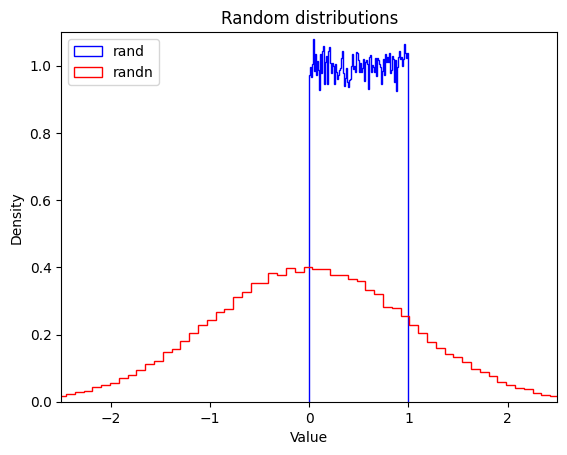

In [22]:
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## np.fromfunction
You can also initialize an `ndarray` using a function:

In [23]:
def my_function(z, y, x):
    return x + 10 * y + 100 * z

np.fromfunction(my_function, (3, 2, 10))

array([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.]],

       [[100., 101., 102., 103., 104., 105., 106., 107., 108., 109.],
        [110., 111., 112., 113., 114., 115., 116., 117., 118., 119.]],

       [[200., 201., 202., 203., 204., 205., 206., 207., 208., 209.],
        [210., 211., 212., 213., 214., 215., 216., 217., 218., 219.]]])

NumPy first creates three `ndarray`s (one per dimension), each of shape `(3, 2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to their z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

So the terms `x`, `y` and `z` in the expression `x + 10 * y + 100 * z` above are in fact `ndarray`s (we will discuss arithmetic operations on arrays below).  The point is that the function `my_function` is only called *once*, instead of once per element. This makes initialization very efficient.

# Array data
## `dtype`
NumPy's `ndarray`s are also efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

In [24]:
c = np.arange(1, 5)
print(c.dtype, c)

int64 [1 2 3 4]


In [25]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [1. 2. 3. 4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

In [26]:
d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

complex64 [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


Available data types include signed `int8`, `int16`, `int32`, `int64`, unsigned `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` and `complex64`|`128`. Check out the documentation for the [basic types](https://numpy.org/doc/stable/user/basics.types.html) and [sized aliases](https://numpy.org/doc/stable/reference/arrays.scalars.html#sized-aliases) for the full list.

## `itemsize`
The `itemsize` attribute returns the size (in bytes) of each item:

In [27]:
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

## `data` buffer
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

In [28]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

In python 2, `f.data` is a buffer. In python 3, it is a memoryview.

In [29]:
if hasattr(f.data, "tobytes"):
    data_bytes = f.data.tobytes() # python 3
else:
    data_bytes = memoryview(f.data).tobytes() # python 2

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Several `ndarray`s can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

# Reshaping an array
## In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [30]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [31]:
g.shape = (6, 4)
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [32]:
g.shape = (2, 3, 4)
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


## `reshape`
The `reshape` function returns a new `ndarray` object pointing at the *same* data. This means that modifying one array will also modify the other.

In [33]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [34]:
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

The corresponding element in `g` has been modified.

In [35]:
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

## `ravel`
Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

In [36]:
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

# Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*:

In [37]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

# Broadcasting

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

## First rule
*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

In [38]:
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [39]:
h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

## Second rule
*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*

In [40]:
k = np.arange(6).reshape(2, 3)
k

array([[0, 1, 2],
       [3, 4, 5]])

Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [41]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

Combining rules 1 & 2, we can do this:

In [42]:
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

array([[100, 201, 302],
       [103, 204, 305]])

And also, very simply:

In [43]:
k + 1000  # same as: k + [[1000, 1000, 1000], [1000, 1000, 1000]]

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

## Third rule
*After rules 1 & 2, the sizes of all arrays must match.*

In [44]:
try:
    k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


Broadcasting rules are used in many NumPy operations, not just arithmetic operations, as we will see below.
For more details about broadcasting, check out [the documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).

> So in summary **broadcasting** has 3 rules:
> 1. A 1 will be added to the rank until both operands are of the same rank
> 2. If one of the operands is of size 1 along an axis, values will be duplicated in that direction until both arrays are of the same dimensions too
> 3. And so following from rules 1 and 2, then 3 means both arrays must have the same rank and dimensions/have the same shapes
> 
> Obviously this doesn't necessarily mean that numpy actually resizes the arrays in memory.

## Upcasting
When trying to combine arrays with different `dtype`s, NumPy will *upcast* to a type capable of handling all possible values (regardless of what the *actual* values are).

In [45]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

uint8 [0 1 2 3 4]


In [46]:
k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

int16 [ 5  7  9 11 13]


Note that `int16` is required to represent all *possible* `int8` and `uint8` values (from -128 to 255), even though in this case a `uint8` would have sufficed.

In [47]:
k3 = k1 + 1.5
print(k3.dtype, k3)

float64 [1.5 2.5 3.5 4.5 5.5]


# Conditional operators

The conditional operators also apply elementwise:

In [48]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False])

And using broadcasting:

In [49]:
m < 25  # equivalent to m < [25, 25, 25, 25]

array([ True,  True, False, False])

This is most useful in conjunction with boolean indexing (discussed below).

In [50]:
m[m < 25]

array([20, -5])

# Mathematical and statistical functions

Many mathematical and statistical functions are available for `ndarray`s.

## `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [51]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean())

[[-2.5  3.1  7. ]
 [10.  11.  12. ]]
mean = 6.766666666666667


Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

Here are a few more useful `ndarray` methods:

In [52]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

In [53]:
c=np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [54]:
c.sum(axis=0)  # sum across matrices
# i.e the first axis (so effectively 2 matrices)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [55]:
c.sum(axis=1)  # sum across rows

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

You can also sum over multiple axes:

In [56]:
print(c.sum(axis=(0,2)))  # sum across matrices and columns
print(c.sum(axis=(0,1,2)) == c.sum()) # sum across everything

[ 60  92 124]
True


In [57]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

(60, 92, 124)

## Universal functions
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [58]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[  6.25,   9.61,  49.  ],
       [100.  , 121.  , 144.  ]])

Here are a few more useful unary ufuncs:

In [59]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Original ndarray
[[-2.5  3.1  7. ]
 [10.  11.  12. ]]

 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[       nan 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[8.20849986e-02 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[       nan 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[-2.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[-2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


/tmp/ipykernel_18/2634842825.py:5: RuntimeWarning: invalid value encountered in sqrt
  print(func(a))
/tmp/ipykernel_18/2634842825.py:5: RuntimeWarning: invalid value encountered in log
  print(func(a))


The two warnings are due to the fact that `sqrt()` and `log()` are undefined for negative numbers, which is why there is a `np.nan` value in the first cell of the output of these two functions.

## Binary ufuncs
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [60]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

array([ 3,  6,  2, 11])

In [61]:
np.greater(a, b)  # equivalent to a > b

array([False, False,  True, False])

In [62]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [63]:
np.copysign(a, b)
# changes sign of elems of a to elems of b elementwise
# same as np.fabs(a) * np.sign(b) when no elements in b are 0

array([ 1.,  2., -3.,  4.])

# Array indexing
## One-dimensional arrays
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [64]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [65]:
a[2:5]

array([ 3, 19, 13])

In [66]:
a[2:-1]

array([ 3, 19, 13,  7])

In [67]:
a[:2]

array([1, 5])

In [68]:
a[2::2]

array([ 3, 13,  3])

In [69]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

Of course, you can modify elements:

In [70]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

You can also modify an `ndarray` slice:

In [71]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

## Differences with regular python arrays
Contrary to regular python arrays, if you assign a single value to an `ndarray` slice, it is copied across the whole slice, thanks to broadcasting rules discussed above.

In [72]:
a[2:5] = -1 # due to broadcasting
a

array([ 1,  5, -1, -1, -1,  7,  3])

Also, you cannot grow or shrink `ndarray`s this way:

In [73]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

could not broadcast input array from shape (6,) into shape (3,)


You cannot delete elements either:

In [74]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


Last but not least, `ndarray` **slices are actually *views*** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original `ndarray` as well!

In [75]:
a_slice = a[2:6]
a_slice[1] = 1000
a  # the original array was modified!

array([   1,    5,   -1, 1000,   -1,    7,    3])

In [76]:
a[3] = 2000
a_slice  # similarly, modifying the original array modifies the slice!

array([  -1, 2000,   -1,    7])

If you want a copy of the data, you need to use the `copy` method:

In [77]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
a  # the original array is untouched

array([   1,    5,   -1, 2000,   -1,    7,    3])

In [78]:
a[3] = 4000
another_slice  # similarly, modifying the original array does not affect the slice copy

array([  -1, 3000,   -1,    7])

## Multidimensional arrays
Multidimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [79]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [80]:
b[1, 2]  # row 1, col 2

14

In [81]:
b[1, :]  # row 1, all columns

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [82]:
b[:, 1]  # all rows, column 1

array([ 1, 13, 25, 37])

**Caution**: note the subtle difference between these two expressions: 

In [83]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [84]:
b[1:2, :] # sinc we're indexing using the slice notation, returns a 2D array

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## Fancy indexing
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [85]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [86]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1 (again, and in this order)

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [87]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again)

array([41, 33, 37, 33])

## Higher dimensions
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [88]:
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [89]:
c[2, 1, 4]  # matrix 2, row 1, col 4

34

In [90]:
c[2, :, 3]  # matrix 2, all rows, col 3

array([27, 33])

If you omit coordinates for some axes, then all elements in these axes are returned:

In [91]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

## Ellipsis (`...`)
You may also write an ellipsis (`...`) to ask that all non-specified axes be entirely included.

In [92]:
c[:, :, 2]  #  matrix 2, all rows, all columns.
# This is equivalent to c[:, :, 2]
# c[..., 2] is equiv to c[2, :, :]

array([[ 2,  8],
       [14, 20],
       [26, 32],
       [38, 44]])

In [93]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [94]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

array([27, 33])

In [95]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

## Boolean indexing
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [96]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [97]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [98]:
cols_on = np.array([False, True, False] * 4)
print(np.array([False, True, False] * 4))
b[:, cols_on]  # All rows, columns 1, 4, 7 and 10

[False  True False False  True False False  True False False  True False]


array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

## `np.ix_`
You cannot use boolean indexing this way on multiple axes, but you can work around this by using the `ix_` function:

In [99]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [100]:
np.ix_(rows_on, cols_on)

(array([[0],
        [2]]),
 array([[ 1,  4,  7, 10]]))

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [101]:
print("Element wise arithmetic operation:")
print(b % 3)
print("\nElement wise boolean operation:")
print(b % 3 == 1)
print("\nAnd finally indexing using the ndarray:")
b[b % 3 == 1]

Element wise arithmetic operation:
[[0 1 2 0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2 0 1 2]
 [0 1 2 0 1 2 0 1 2 0 1 2]]

Element wise boolean operation:
[[False  True False False  True False False  True False False  True False]
 [False  True False False  True False False  True False False  True False]
 [False  True False False  True False False  True False False  True False]
 [False  True False False  True False False  True False False  True False]]

And finally indexing using the ndarray:


array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

# Iterating
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [102]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [103]:
for m in c:
    print("Item:")
    print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [104]:
for i in range(len(c)):  # Note that len(c) == c.shape[0]
    print("Item:")
    print(c[i])

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:

In [105]:
for i in c.flat:
    print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


# Stacking arrays
It is often useful to stack together different arrays. NumPy offers several functions to do just that. Let's start by creating a few arrays.

In [106]:
q1 = np.full((3,4), 1.0)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [107]:
q2 = np.full((4,4), 2.0)
q2

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [108]:
q3 = np.full((3,4), 3.0)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

## `vstack`
Now let's stack them vertically using `vstack`:

In [109]:
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [110]:
q4.shape

(10, 4)

It was possible because q1, q2 and q3 all have the same shape (except for the vertical axis, but that's ok since we are stacking on that axis).

## `hstack`
We can also stack arrays horizontally using `hstack`:

In [111]:
q5 = np.hstack((q1, q3))
q5

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [112]:
q5.shape

(3, 8)

It is possible because q1 and q3 both have 3 rows. But since q2 has 4 rows, it cannot be stacked horizontally with q1 and q3:

In [113]:
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4


## `concatenate`
The `concatenate` function stacks arrays along any given existing axis.

In [114]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
# i.e. concatenate on the rows axis, since here axis=0 is the rows
# and similarly axis=1 for hstack
# 1D arrays are basically treated as 1 row 2D arrays
# for higher dims still uses axis=0 for vstack, axis=1 for hstack
q7

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [115]:
q7.shape

(10, 4)

As you might guess, `hstack` is equivalent to calling `concatenate` with `axis=1`, since `axis=1` would correspond to the elements axis/columns axis.

## `stack`
The `stack` function stacks arrays along a new axis. All arrays have to have the same shape.

In [116]:
q8 = np.stack((q1, q3))
q8

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

In [117]:
q8.shape

(2, 3, 4)

# Splitting arrays
Splitting is the opposite of stacking. For example, let's use the `vsplit` function to split a matrix vertically.

First let's create a 6x4 matrix:

In [118]:
r = np.arange(24).reshape(6,4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Now let's split it in three equal parts, vertically:

In [119]:
r1, r2, r3 = np.vsplit(r, 3)
# split along axis=0 (i.e the first axis) in equal parts
r1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [120]:
r2

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [121]:
r3

array([[16, 17, 18, 19],
       [20, 21, 22, 23]])

There is also a `split` function which splits an array along any given axis. Calling `vsplit` is equivalent to calling `split` with `axis=0`. There is also an `hsplit` function, equivalent to calling `split` with `axis=1`:

In [122]:
r4, r5 = np.hsplit(r, 2)
r4

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17],
       [20, 21]])

In [123]:
r5

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23]])

# Transposing arrays
The `transpose` method creates a new view on an `ndarray`'s data, with axes permuted in the given order.

For example, let's create a 3D array:

In [124]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Now let's create an `ndarray` such that the axes `0, 1, 2` (depth, height, width) are re-ordered to `1, 2, 0` (depth→width, height→depth, width→height):

In [125]:
# i.e. for shape (a,b,c), (1,2,0) will change it to (c,a,b)
# by moving a to shape idx 1, b to shape idx 2, c to shape idx 0
# so the tuple input to transpose is basically just specifying
# what index the corresponding axis should go to
t1 = t.transpose((1,2,0))
t1

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [126]:
t1.shape

(2, 3, 4)

By default, `transpose` reverses the order of the dimensions:

In [127]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0))
t2

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

In [128]:
t2.shape

(3, 2, 4)

NumPy provides a convenience function `swapaxes` to swap two axes. For example, let's create a new view of `t` with depth and height swapped:

In [129]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
t3

array([[[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 14],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]]])

In [130]:
t3.shape

(2, 4, 3)

# Linear algebra
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra, vectors and matrices, go through the [Linear Algebra tutorial](math_linear_algebra.ipynb).

## Matrix transpose
The `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [131]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [132]:
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

The `T` attribute has no effect on rank 0 (empty) or rank 1 arrays:

In [133]:
m2 = np.arange(5)
m2

array([0, 1, 2, 3, 4])

In [134]:
m2.T

array([0, 1, 2, 3, 4])

We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [135]:
m2r = m2.reshape(1,5)
m2r

array([[0, 1, 2, 3, 4]])

In [136]:
m2r.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

## Matrix multiplication
Let's create two matrices and execute a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) using the `dot()` method.

In [137]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [138]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [139]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Caution**: as mentioned previously, `n1*n2` is *not* a matrix multiplication, it is an elementwise product (also called a [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))).

## Matrix inverse and pseudo-inverse
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

In [140]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [141]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [142]:
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## Identity matrix
The product of a matrix by its inverse returns the identity matrix (with small floating point errors):

In [143]:
m3.dot(linalg.inv(m3))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00],
       [ 6.31439345e-16,  1.00000000e+00, -1.38777878e-16],
       [ 5.21110932e-15, -2.38697950e-15,  1.00000000e+00]])

You can create an identity matrix of size NxN by calling `eye(N)` function:

In [144]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## QR decomposition
The `qr` function computes the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of a matrix:

In [145]:
q, r = linalg.qr(m3)
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [146]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [147]:
q.dot(r)  # q.r equals m3

array([[ 1.,  2.,  3.],
       [ 5.,  7., 11.],
       [21., 29., 31.]])

## Determinant
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [148]:
linalg.det(m3)  # Computes the matrix determinant

43.99999999999997

## Eigenvalues and eigenvectors
The `eig` function computes the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a square matrix:

In [149]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

array([42.26600592, -0.35798416, -2.90802176])

In [150]:
eigenvectors # v

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [151]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

array([[ 6.21724894e-15,  1.66533454e-15, -3.10862447e-15],
       [ 3.55271368e-15,  5.30131494e-15, -5.32907052e-15],
       [ 3.55271368e-14,  5.38458167e-15, -9.76996262e-15]])

## Singular Value Decomposition
The `svd` function takes a matrix and returns its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition):

In [152]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [153]:
U, S_diag, V = linalg.svd(m4)
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.]])

In [154]:
S_diag

array([3.        , 2.23606798, 2.        , 0.        ])

The `svd` function just returns the values in the diagonal of Σ, but we want the full Σ matrix, so let's create it:

In [155]:
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
print(S) # Σ
print("\nThis should have same first 4 cols as np.diag(S_diag), let's check:")
print(np.allclose(S[:, :4], np.diag(S_diag)))
print("\nAnd further, if we hstack a col of zeros onto the diag, same thing:")
print(np.allclose(S, np.hstack((np.diag(S_diag), np.zeros((4, 1))))))

[[3.         0.         0.         0.         0.        ]
 [0.         2.23606798 0.         0.         0.        ]
 [0.         0.         2.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]

This should have same first 4 cols as np.diag(S_diag), let's check:
True

And further, if we hstack a col of zeros onto the diag, same thing:
True


In [156]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 ,  0.        ,  0.        ,  0.        ,  0.89442719],
       [ 0.        , -1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [157]:
U.dot(S).dot(V) # U.Σ.V == m4

array([[1., 0., 0., 0., 2.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.]])

## Diagonal and trace

In [158]:
np.diag(m3)  # the values in the diagonal of m3 (top left to bottom right)

array([ 1,  7, 31])

In [159]:
m3.trace()  # equivalent to np.diag(m3).sum()

39

## Solving a system of linear scalar equations

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [160]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Let's check the solution:

In [161]:
coeffs.dot(solution), depvars  # yep, it's the same

(array([ 6., -9.]), array([ 6, -9]))

Looks good! Another way to check the solution:

In [162]:
np.allclose(coeffs.dot(solution), depvars)

True

# Vectorization
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [163]:
import math

data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x * y / 40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [164]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ...,
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [165]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the vertical coordinate.

Now we can simply compute the result using array operations:

In [166]:
data = np.sin(X * Y / 40.5)
print(data)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02468885 0.04936265 ... 0.07705885 0.1016508  0.12618078]
 [0.         0.04936265 0.09860494 ... 0.15365943 0.20224852 0.25034449]
 ...
 [0.         0.03932283 0.07858482 ... 0.6301488  0.59912825 0.56718092]
 [0.         0.06398059 0.12769901 ... 0.56844086 0.51463783 0.45872596]
 [0.         0.08859936 0.17650185 ... 0.50335246 0.42481591 0.34293805]]


Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

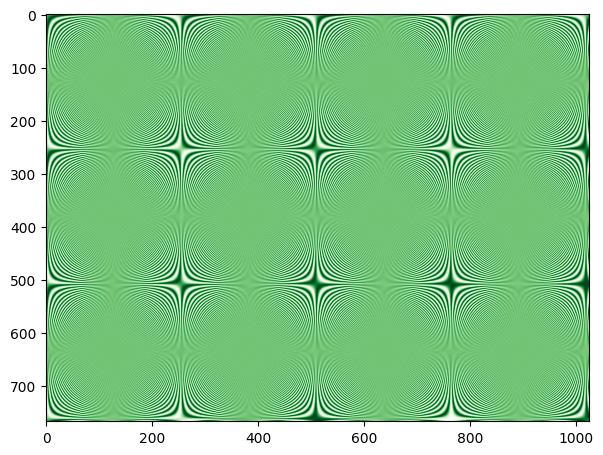

In [167]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap="Greens")
plt.show()

# Saving and loading
NumPy makes it easy to save and load `ndarray`s in binary or text format.

## Binary `.npy` format
Let's create a random array and save it.

In [168]:
a = np.random.rand(2,3)
a

array([[0.49087993, 0.69591595, 0.6439108 ],
       [0.2587403 , 0.68034531, 0.99848449]])

In [169]:
np.save("my_array", a)

Done! Since the file name contains no file extension, NumPy automatically added `.npy`. Let's take a peek at the file content:

In [170]:
with open("my_array.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }                                                          \n@\x11\x1c\xa9\x93j\xdf?*\xf1=\x85\xf1D\xe6?\xca\xc6{\xd4\xea\x9a\xe4?\x1a:\x84y3\x8f\xd0?J|\xd4\x85c\xc5\xe5?\x98&?\xc0\x95\xf3\xef?"

To load this file into a NumPy array, simply call `load`:

In [171]:
a_loaded = np.load("my_array.npy")
a_loaded

array([[0.49087993, 0.69591595, 0.6439108 ],
       [0.2587403 , 0.68034531, 0.99848449]])

## Text format
Let's try saving the array in text format:

In [172]:
np.savetxt("my_array.csv", a)

Now let's look at the file content:

In [173]:
with open("my_array.csv", "rt") as f:
    print(f.read())

4.908799315892515835e-01 6.959159471876195102e-01 6.439108038013838797e-01
2.587402998623545836e-01 6.803453077190024789e-01 9.984844927614231480e-01



This is a CSV file with tabs as delimiters. You can set a different delimiter:

In [174]:
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [175]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

array([[0.49087993, 0.69591595, 0.6439108 ],
       [0.2587403 , 0.68034531, 0.99848449]])

## Zipped `.npz` format
It is also possible to save multiple arrays in one zipped file:

In [176]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [177]:
np.savez("my_arrays", my_a=a, my_b=b)

Again, let's take a peek at the file content. Note that the `.npz` file extension was automatically added.

In [178]:
with open("my_arrays.npz", "rb") as f:
    content = f.read()

repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\x00\\x00!\\x00\\xe5vl\\xd7\\xb0\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\x08\\x00\\x14\\x00my_a.npy\\x01\\x00\\x10\\x00\\xb0\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xb0\\x00\\x00\\x00\\[...]'

You then load this file like so:

In [179]:
my_arrays = np.load("my_arrays.npz")
my_arrays

NpzFile 'my_arrays.npz' with keys: my_a, my_b

This is a dict-like object which loads the arrays lazily:

In [180]:
my_arrays.keys()

KeysView(NpzFile 'my_arrays.npz' with keys: my_a, my_b)

In [181]:
my_arrays["my_a"]

array([[0.49087993, 0.69591595, 0.6439108 ],
       [0.2587403 , 0.68034531, 0.99848449]])

# What's next?
Now you know all the fundamentals of NumPy, but there are many more options available. The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](https://numpy.org/doc/stable/reference/index.html) to find more functions and features you may be interested in.